# Линейная регрессия

## Лабораторная работа №2


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Волглин Алексей Дмитриевич

Группа: 211-324

Вариант:1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/linreg-1.csv
1. http://labcolor.space/linreg-2.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

In [2]:
# Из соответствующего модуля библиотеки sklearn импортируйте класс нужной модели
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Чтение данных и краткий анализ

In [3]:
# Используя метод read_csv() из Pandas считайте данные для вашего варианта.

df = pd.read_csv("http://labcolor.space/linreg-1.csv", dtype={'target':'category'})  # вставьте в виде строки ссылку в read_csv для загрузки данных


In [4]:
# Используя методы describe(), head() просмотрите ваши данные.
df.head()
df.describe(include='number')



,X,y
count,50.000000,50.000000
mean,15.970735,30.363804
std,8.403019,23.541054
min,0.362969,2.698014
25%,10.251188,18.915306
50%,15.892694,25.987420
75%,21.026480,35.029801
max,34.670504,113.693596


**Сколько объектов есть в вашем наборе данных?**

Ответ:50

**Сколько и каких признаков у ваших объектов?**

Ответ: 2 - это x и y

## Проверка на отсутствующие значения

Используя метод isnull() датафрейма (df) проверьте есть ли отсутствующие значения в ваших данных.

In [6]:
df.isnull().head(5)

,X,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


Если в вашем наборе данных есть пропуски, то удалите эти образцы используя метод dropna().

In [7]:
df.dropna().head(5)

,X,y
0,15.374756,24.394275
1,0.780478,3.333808
2,20.828226,35.224102
3,22.883040,37.235602
4,32.212915,50.746781


**Сколько объектов было удалено?**

Ответ:0

Используя метод pop() разделите ваши зависимые и независимые переменные - X, y

In [8]:
y =  df.pop('y')
X =  df

Далее используя метод train_test_split() разделите данные на обучающую и проверочную части. В тестовую часть выделите 20% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2, train_size=0.8)

## Обучение без обработки

In [10]:
# Создайте объект модели линейной регрессии

regr = LinearRegression()

# Обучите модель с использованием обучающего набора

regr.fit(X_train, y_train)  # ваш код

# Сделайте прогноз используя полученную модель

y_pred = regr.predict(X_test)  # ваш код

**Сколько параметров в вашей модели линейной регрессии?**

Ваш ответ: 2 (kx+b)

Сравните спрогнозированные значения с тестовыми с помощью средней квадратичной ошибки и коэффициент детерминации.

In [11]:
# В функции требуется передать нужные данные

print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")

Средняя квадратичная ошибка 81.78
Коэффициент детерминации 0.13


Визуализация результатов.

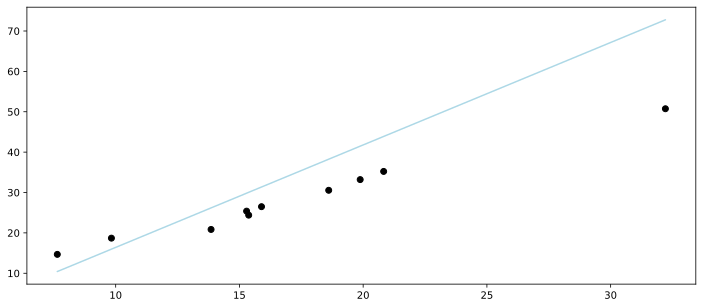

In [12]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="lightblue")

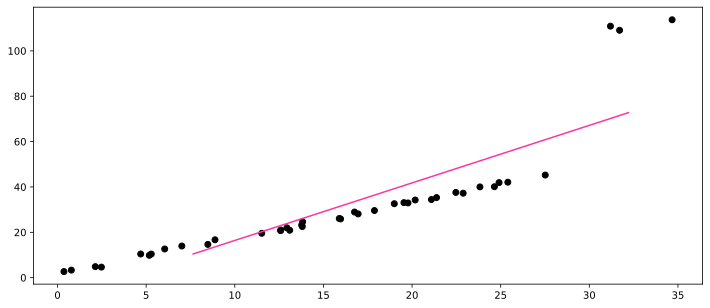

In [13]:
plt.scatter(X_train, y_train, color="black")
plt.plot(X_test, y_pred, color="#FA36A0")

## Удаление выбросов

Для удаления выбросов воспользуемся z-оценкой.

$z_i = \frac{x_i - \mu}{\sigma}$, где

$\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [14]:
# Используя метод read_csv() из Pandas повторно считайте данные для вашего варианта.
df = pd.read_csv("http://labcolor.space/linreg-1.csv", dtype={'target':'category'})
df.head()

,X,y
0,15.374756,24.394275
1,0.780478,3.333808
2,20.828226,35.224102
3,22.883040,37.235602
4,32.212915,50.746781


С помощью np.mean() и np.std() рассчитайте $\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [15]:
mean = np.mean(df["y"])
std = np.std(df["y"])
print(mean, std, sep='\n')

30.363804399017383
23.304454563852627


Добавляем к нашим данным новую колонку z-score.

In [17]:
df["z-score"] = df.apply(lambda x: (x['y'] - mean) / std, axis=1)
df['z-score'].head(5)

0   -0.256154
1   -1.159864
2    0.208557
3    0.294871
4    0.874639
Name: z-score, dtype: float64

**Опишите что такое lambda в python**

Ваш ответ: это разновидность функции. Лямбда-функции могут быть вызваны любым объектом и по сути являются безымянными. С их помощью можно передавать аргументы

Если z-оценка больше +3 или меньше -3, то данное значение считаем выбросом и удаляем его из наших данных.

In [19]:
df = df.loc[(df['z-score'] <= 3) & (df['z-score'] >= -3)]
df['z-score'].head(5)

0   -0.256154
1   -1.159864
2    0.208557
3    0.294871
4    0.874639
Name: z-score, dtype: float64

In [20]:
print(len(df))

47


**В чем заключается идея z-оценки и что подразумевает диапазон от -3 до 3?**

Ваш ответ: объекты, которые выходят из границы сигмы (норм.распределения) на ±3, будут удалены

**Сколько значений было удалено как выбросы?**

Ваш ответ: 3

## Обучение после обработки

In [21]:
z = df.pop('z-score')
y1 = df.pop('y')
X1 = df
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=40, test_size=0.2, train_size=0.8)

reg = LinearRegression()

# Обучите модель с использованием обучающего набора

reg.fit(X_train, y_train)

# Сделайте прогноз используя полученную модель

y1_pred = reg.predict(X_test)

# ваш код

Как и в разделе обучение без обработки оцените модель регрессии по средней квадратичной ошибке и коэффициенту детерминации.

In [22]:
print(f"Средняя квадратичная ошибка после удаления выброса {mean_squared_error(y_test, y1_pred):.2f}")
print(f"Коэффициент детерминации после удаления выброса {r2_score(y_test, y1_pred):.2f}")

Средняя квадратичная ошибка после удаления выброса 1.02
Коэффициент детерминации после удаления выброса 0.99


### Визуализируйте результат.

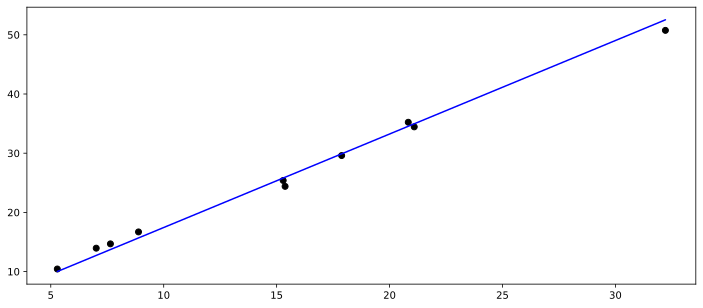

In [24]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y1_pred, color="blue")

Сравните результаты до работы с выбросами и после.

**Как изменились результаты работы модели после удаления выбросов?**

Ваш ответ: предсказание дало очень точную оценку, выбросы больше не смещают кривую

**Опишите идею метода наименьших квадратов.**

Ваш ответ: чем меньше квадрат расстояния по y к линии предсказания, тем точнее будут данные